In [4]:
import pandas as pd
import numpy as np
import seaborn as sns 
import scipy.stats as st
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
import io
df= pd.read_csv(io.BytesIO(uploaded['mtcars (1).csv']))
df.head()


Saving mtcars (1).csv to mtcars (1) (2).csv


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
df.head(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


1.   mpg	Miles/(US) gallon
2.  cyl	Number of cylinders
3.  disp	Displacement (cu.in.)
4.    hp	Gross horsepower
5.    drat	Rear axle ratio
6.   wt	Weight (1000 lbs)
7.    qsec	1/4 mile time
8.   vs	Engine (0 = V-shaped, 1 = straight)
9.   am	Transmission (0 = automatic, 1 = manual)
10.   gear	Number of forward gears
11.  carb	Number of carburetors



In [10]:
df.columns

(32, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
model    32 non-null object
mpg      32 non-null float64
cyl      32 non-null int64
disp     32 non-null float64
hp       32 non-null int64
drat     32 non-null float64
wt       32 non-null float64
qsec     32 non-null float64
vs       32 non-null int64
am       32 non-null int64
gear     32 non-null int64
carb     32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


### We can see that there are no null or missing  values in whole data set thus missing values treatment is not required.

In [9]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


Assuming our target variable to be mpg we will proceed with the analysis.
mpg - continuous data. Since model is irrelevant to our analysis we can drop the column

In [13]:
cars = df.drop(columns='model')
cars.shape

(32, 11)

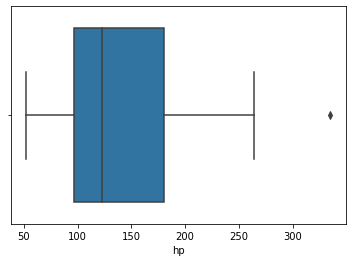

In [17]:
cars['hp'].value_counts(bins=5)
sns.boxplot(cars['hp'])


# Since there is only one outliers present in hp feature we can treat the outliers.

In [71]:
## Outlier calculation , Q3+1.5IQR and Q1 - 1.5IQR 
Upper_limit = 180 + 1.5 * (180-96.5)
Lower_limit = 96.5 - 1.5 * (180-96.5)
print('Upper_limit :', Upper_limit)
print('Lower_limit :', Lower_limit)
cars = cars[cars['hp']<Upper_limit]
cars.shape

Upper_limit : 305.25
Lower_limit : -28.75


(31, 11)

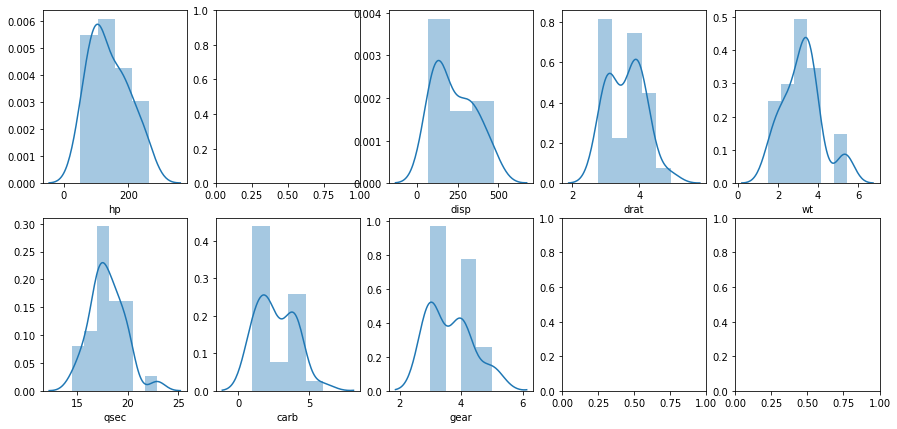

In [74]:
fig,ax = plt.subplots(2,5,figsize =(15,7))
sns.distplot(cars['hp'],ax=ax[0][0])
sns.distplot(cars['disp'],ax=ax[0][2])
sns.distplot(cars['drat'],ax=ax[0][3])
sns.distplot(cars['wt'],ax=ax[0][4])
sns.distplot(cars['qsec'],ax=ax[1][0])
sns.distplot(cars['carb'],ax=ax[1][1])
sns.distplot(cars['gear'],ax=ax[1][2])

plt.show()

# Lets take hp ,number of cylinders  wrt mpg

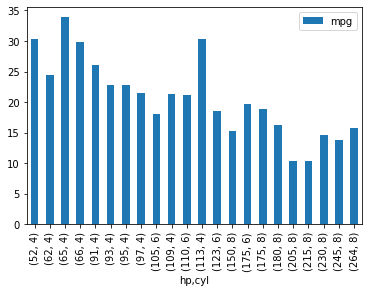

In [68]:
cars.groupby(['hp','cyl']).agg({'mpg':'mean'}).plot.bar()

### We can infer that only hp and cyl are not affecting the mpg of the cars as there is no significant pattern when both are involved

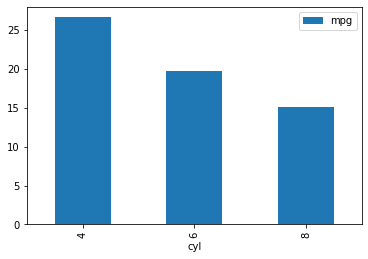

In [69]:
cars.groupby('cyl').agg({'mpg':'mean'}).plot.bar()

### With increase in number of cylinders for cars mpg i.e. miles per gallon decreases.




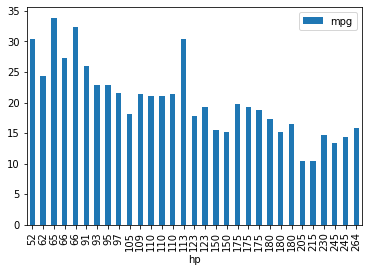

In [70]:
cars[['hp','mpg']].set_index('hp').sort_values(by='hp',ascending=True).plot.bar()


### With increase in horsepower of the cars ,mpg is decreasing . Having said that this is not a very significant trend .Thus we have to take other feature also in analysis.

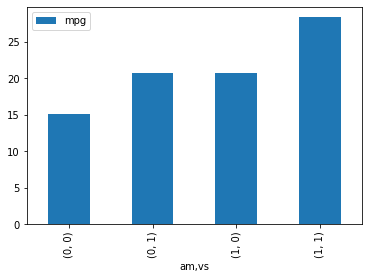

In [99]:
cars.groupby(['am','vs']).agg({'mpg':'mean'}).plot.bar()

### if the car is of manual transmission and straight type engine mpg is high.
### if the car is of automatic transmission and vtype engine mpg is low.

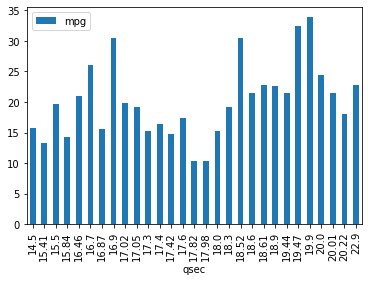

In [104]:
cars.groupby(['qsec']).agg({'mpg':'mean'}).plot.bar(stacked=True)

Check whether the dataset satisfy all the regression assumptions 
Build Multiple Linear Regression model.
Get the accuracy score on train and test data.


In [106]:
cars.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [105]:
X = cars.drop('mpg', axis=1)
y= cars['mpg']
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()


lin_reg.fit(X,y)
print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [-0.08396787  0.01254712 -0.0282899   1.15335642 -3.31135862  0.63888074
  0.14715694  2.13822226  0.69892907 -0.41984451]
Intercept: 14.545034951067784
R^2 score: 0.8686834475542735


In [115]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.30,random_state =1)

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(21, 10)
(10, 10)
(10,)
(21,)


In [116]:
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.862136931464927
R^2 score for test: 0.7575732310059544


In [117]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     13.23
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           9.19e-07
Time:                        19:50:41   Log-Likelihood:                -67.831
No. Observations:                  31   AIC:                             157.7
Df Residuals:                      20   BIC:                             173.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.5450     19.277      0.755      0.459     -25.666      54.756
cyl           -0.0840      1.060     -0.079      0.938      -2.295       2.128
disp           0.0125      0.018      0.692      0.497      -0.025       0.050
hp            -0.0283      0.024     -1.161      0.259      -0.079       0.023
drat           1.1534      1.748      0.660      0.517      -2.494       4.800
wt            -3.3114      2.016     -1.643      0.116      -7.516       0.893
qsec           0.6389      0.791      0.808      0.429      -1.011       2.288
vs             0.1472      2.149      0.068      0.946      -4.336       4.630
am             2.1382      2.164      0.988      0.335      -2.376       6.652
gear           0.6989      1.515      0.461      0.650      -2.462       3.860
carb          -0.4198      0.904     -0.464      0.647      -2.306       1.466
==============================================================================
Omnibus:                        2.145   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.342   Jarque-Bera (JB):                1.933
Skew:                           0.567   Prob(JB):                        0.380
Kurtosis:                       2.539   Cond. No.                     1.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Assumption for Linear Regression

1. No Auto correlation
2. Linearity of variables
3. Normality of error terms
4. No Heteroscedacity
5. No strong MultiCollinearity

### No Auto Correlation

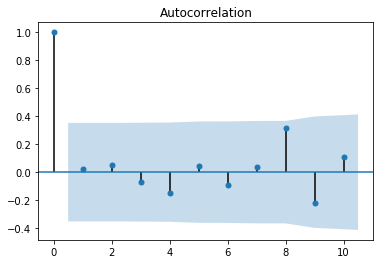

In [120]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid , lags =10,alpha=0.05)
acf.show()

#### From OLS we have value of Durbin Watson Constant as 1.876 which is reaching 2 thus there is very less autocorrelation

##Linearity of Variables

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Predicted')]

<Figure size 432x288 with 0 Axes>

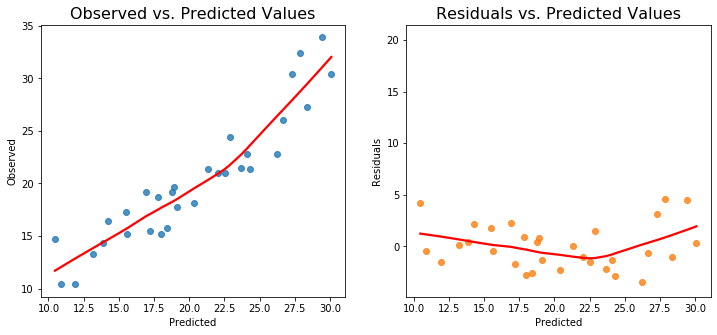

In [129]:

fitted_values =  lin_reg.predict()
residuals  = lin_reg.resid
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.regplot(x=fitted_values, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
ax[0].set(xlabel='Predicted', ylabel='Observed')

sns.regplot(x=fitted_values, y=residuals, lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
ax[1].set(xlabel='Predicted', ylabel='Residuals')

##Normality of Residuals

In [130]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

# Here we have created null hypothesis as error terms or residuals are normally ditributed.

(1.9330472880800045, 0.3804031589577668)


From chi square table for 5% significance and dof as 31 the value comes around 48.5 and which is greater than jarque-bera coefficient.
Thus null we fail to reject null hypothesis which leads to normal distribution of residuals

## No Strong MultiCollinearity

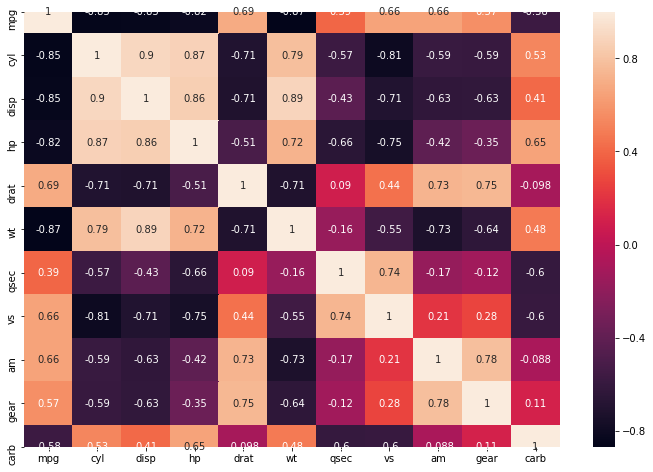

In [136]:

plt.figure(figsize= (12,8))
sns.heatmap(cars.corr(), annot=True)
plt.show()